In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder

In [69]:
df = pd.read_csv("penguins_size.csv")
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [71]:
df.describe(include='all')

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
count,344,344,342.000000,342.000000,342.000000,342.000000,334
unique,3,3,NaN,NaN,NaN,NaN,3
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,MALE
freq,152,168,NaN,NaN,NaN,NaN,168
mean,NaN,NaN,43.921930,17.151170,200.915205,4201.754386,NaN
std,NaN,NaN,5.459584,1.974793,14.061714,801.954536,NaN
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN
25%,NaN,NaN,39.225000,15.600000,190.000000,3550.000000,NaN
50%,NaN,NaN,44.450000,17.300000,197.000000,4050.000000,NaN
75%,NaN,NaN,48.500000,18.700000,213.000000,4750.000000,NaN


In [72]:
df.corr()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
culmen_length_mm,1.000000,-0.235053,0.656181,0.595110
culmen_depth_mm,-0.235053,1.000000,-0.583851,-0.471916
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202
body_mass_g,0.595110,-0.471916,0.871202,1.000000


In [73]:
missing= df.isnull().sum()
missing

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [74]:
#Imputation to replace the missing values.
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')# strategy can also be mean or median 
df.iloc[:,:] = imputer.fit_transform(df)

In [75]:
df.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [76]:
lb = LabelEncoder()
df["sex"] = lb.fit_transform(df["sex"])
df['sex'][:5]

0    2
1    1
2    1
3    2
4    1
Name: sex, dtype: int64

In [77]:
df.head(10)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,2
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,1
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,1
3,Adelie,Torgersen,41.1,17.0,190.0,3800.0,2
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,1
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,2
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,1
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,2
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,2
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,2


In [78]:
lb = LabelEncoder()
df["island"] = lb.fit_transform(df["island"])

In [79]:
df.head(10)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,2,39.1,18.7,181.0,3750.0,2
1,Adelie,2,39.5,17.4,186.0,3800.0,1
2,Adelie,2,40.3,18.0,195.0,3250.0,1
3,Adelie,2,41.1,17.0,190.0,3800.0,2
4,Adelie,2,36.7,19.3,193.0,3450.0,1
5,Adelie,2,39.3,20.6,190.0,3650.0,2
6,Adelie,2,38.9,17.8,181.0,3625.0,1
7,Adelie,2,39.2,19.6,195.0,4675.0,2
8,Adelie,2,34.1,18.1,193.0,3475.0,2
9,Adelie,2,42.0,20.2,190.0,4250.0,2


In [80]:
X = df.drop(columns=['species'])
X

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,2,39.1,18.7,181.0,3750.0,2
1,2,39.5,17.4,186.0,3800.0,1
2,2,40.3,18.0,195.0,3250.0,1
3,2,41.1,17.0,190.0,3800.0,2
4,2,36.7,19.3,193.0,3450.0,1
...,...,...,...,...,...,...
339,0,41.1,17.0,190.0,3800.0,2
340,0,46.8,14.3,215.0,4850.0,1
341,0,50.4,15.7,222.0,5750.0,2
342,0,45.2,14.8,212.0,5200.0,1


Text(0.5, 1.0, 'Box Plot')

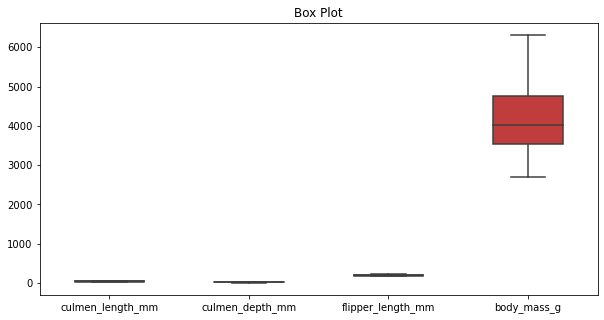

In [104]:
plt.figure(figsize =(10,5))
df1 = df[['culmen_length_mm', 'culmen_depth_mm','flipper_length_mm', 'body_mass_g']]
sns.boxplot(data=df1, width=0.5,fliersize=5,linewidth=None,whis=1.5)
plt.title('Box Plot')




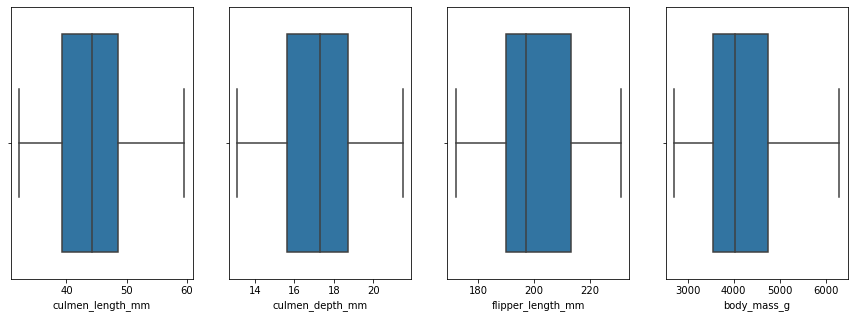

In [107]:
plt.figure(figsize =(15,5))
j=1
for i in ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']: 
    plt.subplot(1,4,j)
    sns.boxplot(data = df1 ,x=i)
    j=j+1

In [109]:
df['species'].value_counts()iplot(kind='bar')

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

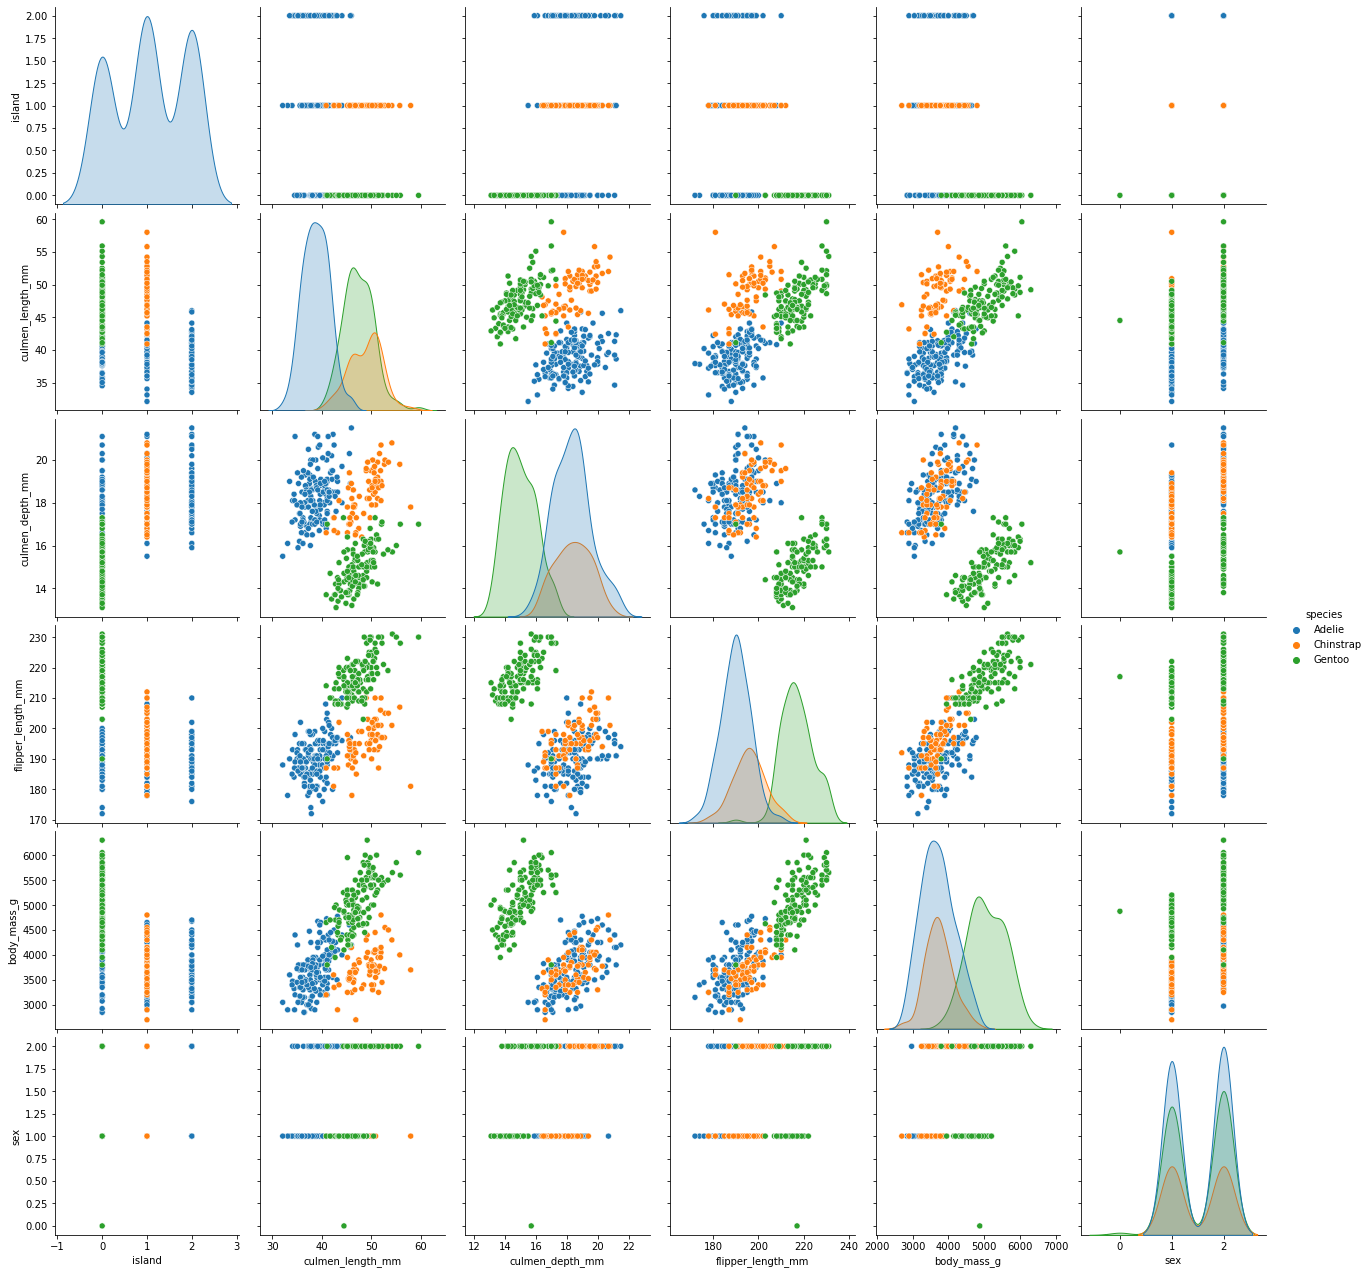

In [113]:
sns.pairplot(df, hue="species", size=3,diag_kind="kde")

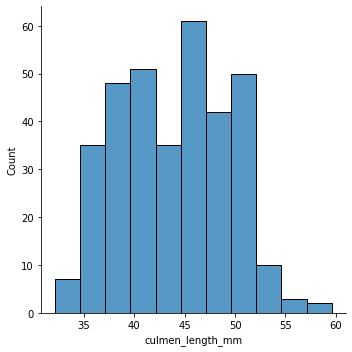

In [32]:
sns.displot(X["culmen_length_mm"])

In [28]:
col = ["culmen_length_mm", "culmen_depth_mm", "flipper_length_mm", "body_mass_g"]
std = StandardScaler()
std_X = pd.DataFrame(std.fit_transform(X[col]), 
                      index = X[col].index, 
                      columns = col)

In [29]:
std_X

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,-0.883375,0.788176,-1.415471,-0.562452
1,-0.809845,0.127001,-1.058960,-0.499877
2,-0.662785,0.432159,-0.417242,-1.188208
3,-0.515725,-0.076437,-0.773752,-0.499877
4,-1.324555,1.093334,-0.559846,-0.937906
...,...,...,...,...
339,-0.515725,-0.076437,-0.773752,-0.499877
340,0.532077,-1.449647,1.008800,0.814210
341,1.193847,-0.737612,1.507915,1.940570
342,0.237957,-1.195349,0.794894,1.252239


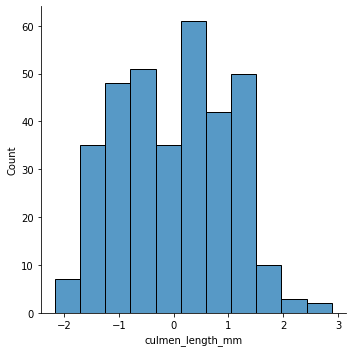

In [31]:
sns.displot(std_X["culmen_length_mm"])

In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score, roc_auc_score, roc_curve, adjusted_rand_score

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import KNNImputer
import imageio
from PIL import Image
import warnings
warnings.filterwarnings("ignore")
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 100)

In [35]:
score_ls = []
for i in range(10):
    kmeans = KMeans(n_clusters = 4, init='random', random_state=i, n_init=1)
    df['pred'] = kmeans.fit_predict(std_X)
    print("Number of iterations: ", kmeans.n_iter_)
    score_ls.append(round(adjusted_rand_score(df['pred'], df['species']), 4))

Number of iterations:  9
Number of iterations:  7
Number of iterations:  7
Number of iterations:  7
Number of iterations:  6
Number of iterations:  7
Number of iterations:  11
Number of iterations:  5
Number of iterations:  9
Number of iterations:  11


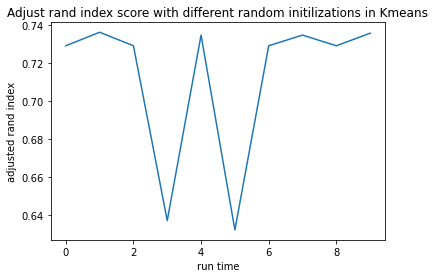

In [36]:
plt.plot(pd.Series(score_ls))
plt.title("Adjust rand index score with different random initilizations in Kmeans")
plt.xlabel('run time')
plt.ylabel('adjusted rand index')
plt.show()

In [37]:
k_scores = []
scores = []
mse = []
k_mse = []
for k in range(2, 10):
    for i in range(10):
        kmeans = KMeans(n_clusters = k, init='random', random_state=i)
        df['pred'] = kmeans.fit_predict(std_X)
        scores.append(round(adjusted_rand_score(df['species'], df['pred']), 4))
        mse.append(round(kmeans.inertia_))
    k_scores.append(np.mean(scores))
    k_mse.append(np.mean(mse))

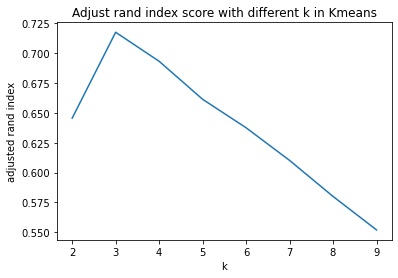

In [38]:
score_df = pd.DataFrame({'k_score':k_scores, 'k':range(2,10)})
plt.plot(score_df['k'], score_df['k_score'])
plt.title("Adjust rand index score with different k in Kmeans")
plt.xlabel('k')
plt.ylabel('adjusted rand index')
plt.show()

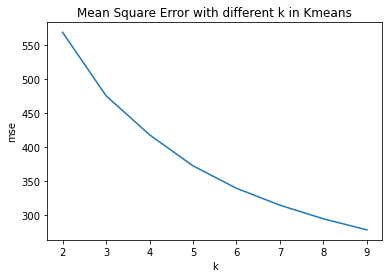

In [39]:
# Plot mean square error
mse_df = pd.DataFrame({'mse':k_mse, 'k':range(2,10)})
plt.plot(mse_df['k'], mse_df['mse'])
plt.title("Mean Square Error with different k in Kmeans")
plt.xlabel('k')
plt.ylabel('mse')
plt.show()

In [40]:
gaussian_scores = []
scores = []
for k in range(2, 10):
    for i in range(10):
        gm = GaussianMixture(n_components=k, init_params='kmeans', tol=1e-4, max_iter=300, random_state=0)
        df['pred'] = gm.fit_predict(std_X)
        scores.append(adjusted_rand_score(df['species'], df['pred']))
    gaussian_scores.append(np.mean(scores))

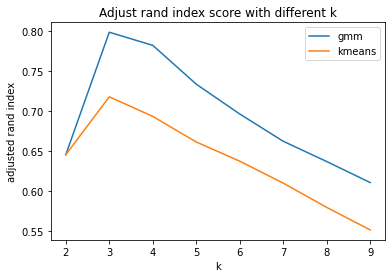

In [41]:
score_df['gmm_score'] = gaussian_scores
plt.plot(score_df['k'], score_df['gmm_score'], label='gmm')
plt.plot(score_df['k'], score_df['k_score'], label='kmeans')
plt.title("Adjust rand index score with different k")
plt.xlabel('k')
plt.ylabel('adjusted rand index')
plt.legend()

In [43]:
pca = PCA(n_components=2)
pca_X = pd.DataFrame(data=pca.fit_transform(std_X), columns=['pc1', 'pc2'])
print('Total variance explained: ', round(pca.explained_variance_ratio_.sum(), 4))
pca_X['true'] = df['species'].values

Total variance explained:  0.8816


In [47]:
lb = LabelEncoder()
df["species"] = lb.fit_transform(df["species"])
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,pred
0,0,2,39.1,18.7,181.0,3750.0,2,5
1,0,2,39.5,17.4,186.0,3800.0,1,5
2,0,2,40.3,18.0,195.0,3250.0,1,8
3,0,2,41.1,17.0,190.0,3800.0,2,5
4,0,2,36.7,19.3,193.0,3450.0,1,5


In [48]:
df.species.unique()

array([0, 1, 2])

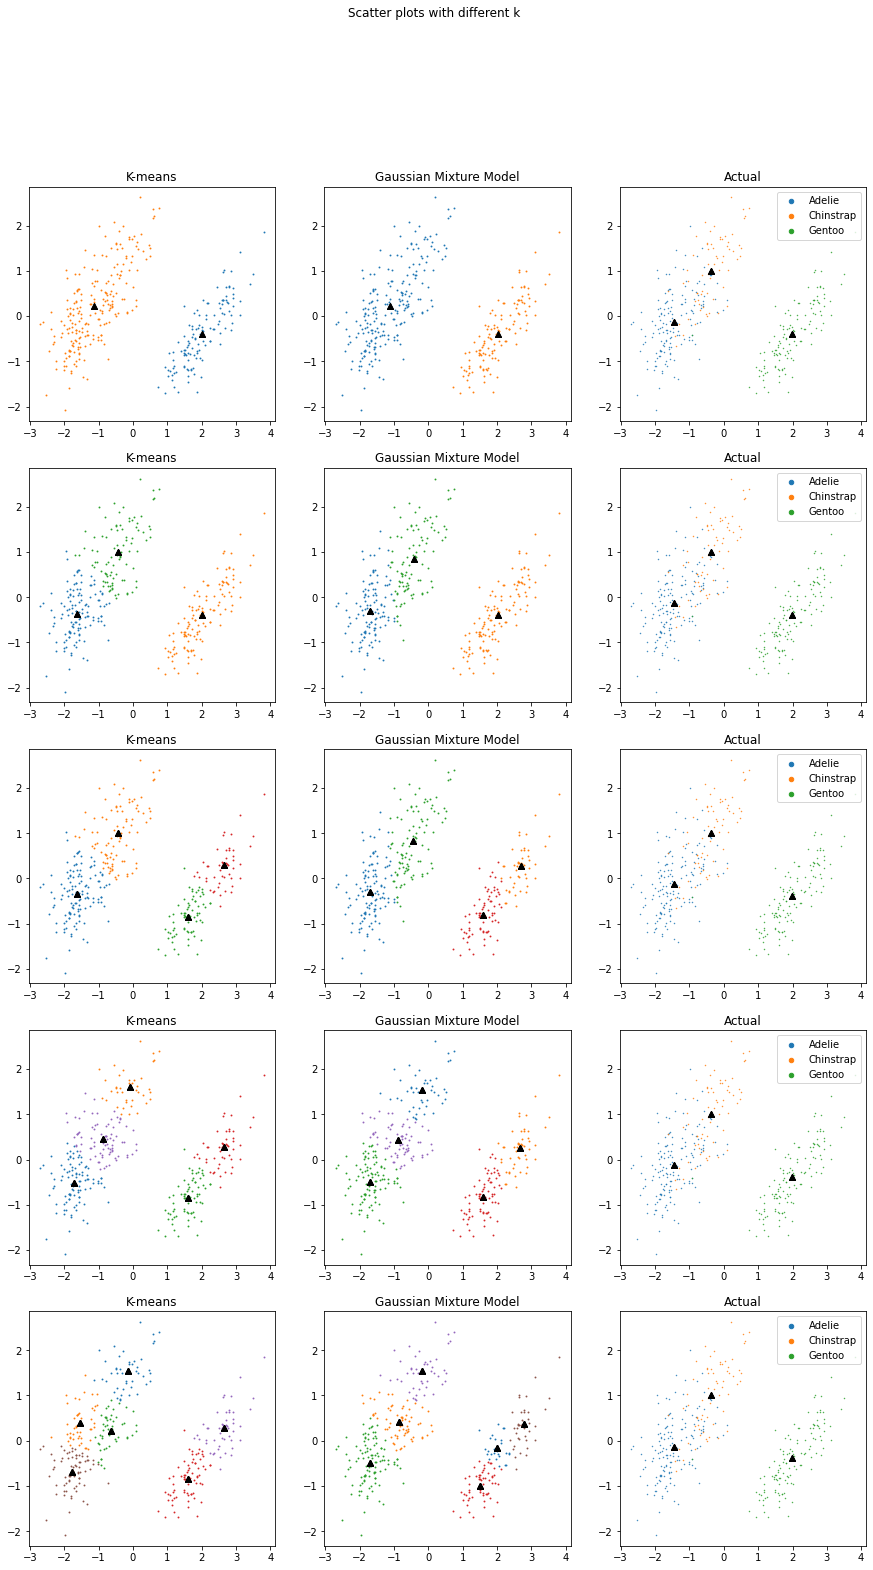

In [67]:
fig, axs = plt.subplots(5, 3, figsize=(15,25))

fig.suptitle("Scatter plots with different k")
pca_X['true'] = df['species'].values

scores_df = pd.DataFrame(columns=['k', 'kmeans', 'gm'])
for k in range(2, 7):
    kmeans = KMeans(n_clusters = k, init='random')
    pca_X['kmeans_pred'] = kmeans.fit_predict(pca_X[['pc1', 'pc2']])
    gm = GaussianMixture(n_components = k)
    pca_X['gaussian_pred'] = gm.fit_predict(pca_X[['pc1', 'pc2']])
    
    kmeans_score = adjusted_rand_score(pca_X['kmeans_pred'], pca_X['true'])
    gm_score = adjusted_rand_score(pca_X['gaussian_pred'], pca_X['true'])
    scores_df.loc[k-2] = [k, kmeans_score, gm_score]
    
    kmeans_centroids = kmeans.cluster_centers_
    gmm_centroids = np.array([[pca_X.loc[pca_X['gaussian_pred']==z, 'pc1'].mean(), 
                               pca_X.loc[pca_X['gaussian_pred']==z, 'pc2'].mean()] for z in range(k)])
    true_centroids = np.array([[pca_X.loc[pca_X['true']==z, 'pc1'].mean(), 
                               pca_X.loc[pca_X['true']==z, 'pc2'].mean()] for z in range(4)])
    music_genre = ['Adelie', 'Chinstrap', 'Gentoo']
    for i in range(k):
        axs[k-2, 0].scatter(pca_X.loc[pca_X['kmeans_pred']==i, 'pc1'], pca_X.loc[pca_X['kmeans_pred']==i, 'pc2'], s = 0.8)
        axs[k-2, 0].scatter(kmeans_centroids[:, 0], kmeans_centroids[:, 1], marker="^", color='black')
        axs[k-2, 0].set_title("K-means")
        axs[k-2, 1].scatter(pca_X.loc[pca_X['gaussian_pred']==i, 'pc1'], pca_X.loc[pca_X['gaussian_pred']==i, 'pc2'], s = 0.8)
        axs[k-2, 1].scatter(gmm_centroids[:, 0], gmm_centroids[:, 1], marker="^", color='black')
        axs[k-2, 1].set_title("Gaussian Mixture Model")
    for j in range(3):
        axs[k-2, 2].scatter(pca_X.loc[pca_X['true']==j, 'pc1'], pca_X.loc[pca_X['true']==j, 'pc2'], s = 0.2, label = music_genre[j])
        axs[k-2, 2].scatter(true_centroids[:, 0], true_centroids[:, 1], marker="^", color='black')
        axs[k-2, 2].set_title("Actual")
    axs[k-2, 2].legend(markerscale=10, loc='upper right')
plt.show()

In [50]:
scores_df

,k,kmeans,gm
0,2.0,0.645629,0.645629
1,3.0,0.717451,0.688380
2,4.0,0.565299,0.542968
3,5.0,0.469905,0.577513
4,6.0,0.408820,0.415009


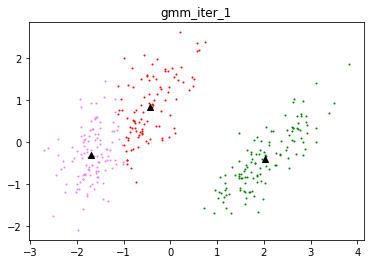

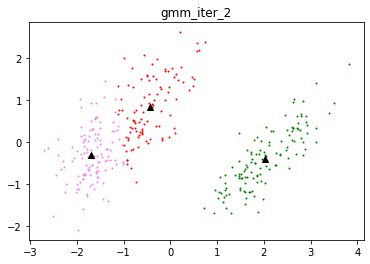

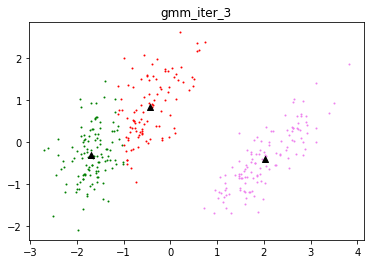

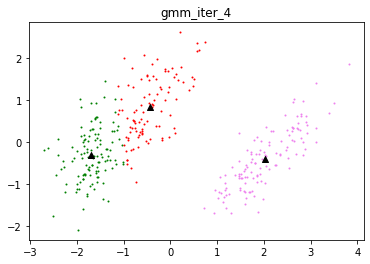

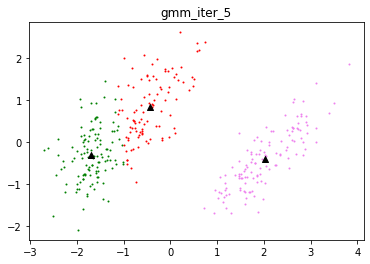

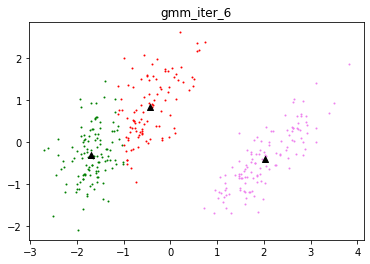

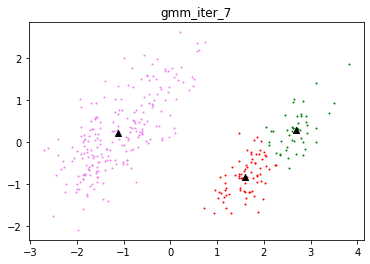

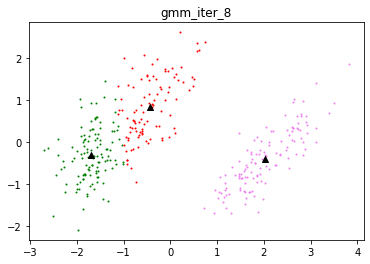

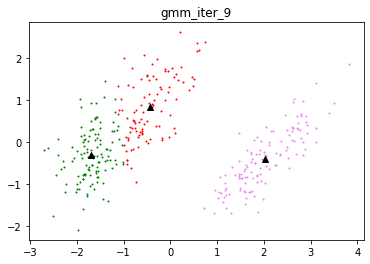

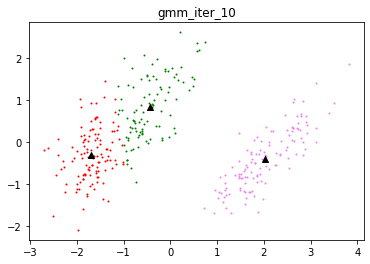

In [66]:
max_iter_ls = [i+1 for i in range(10)]
for max_iter in max_iter_ls:
    gm = GaussianMixture(n_components = 3)
    pca_X['gaussian_pred'] = gm.fit_predict(pca_X[['pc1', 'pc2']])
    gmm_centroids = np.array([[pca_X.loc[pca_X['gaussian_pred']==z, 'pc1'].mean(), 
                               pca_X.loc[pca_X['gaussian_pred']==z, 'pc2'].mean()] for z in range(k)])
    color = ['Green', 'violet', 'red']
    for i in range(3):
        plt.scatter(pca_X.loc[pca_X['gaussian_pred']==i, 'pc1'], pca_X.loc[pca_X['gaussian_pred']==i, 'pc2'], s = 1.0, color = color[i])
    plt.scatter(gmm_centroids[:, 0], gmm_centroids[:, 1], marker="^", color='black')
    plt.title(f"gmm_iter_{max_iter}")
    plt.savefig(f'./gm_iter{max_iter}.jpg')
    plt.show()

In [55]:
#scaler = StandardScaler() 
#scaled_df = scaler.fit_transform(df) 
  
# Normalizing the Data 
#normalized_df = normalize(scaled_df) 
  
# Converting the numpy array into a pandas DataFrame 
#normalized_df = pd.DataFrame(normalized_df) 
#display(normalized_df.describe())
# Reducing the dimensions of the data 
pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(std_X) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 
  
X_principal.head(2)

,P1,P2
0,-1.841372,0.051842
1,-1.303891,-0.426234


In [57]:
gmm = GaussianMixture(n_components = 3) 
gmm.fit(X_principal)

GaussianMixture(n_components=3)

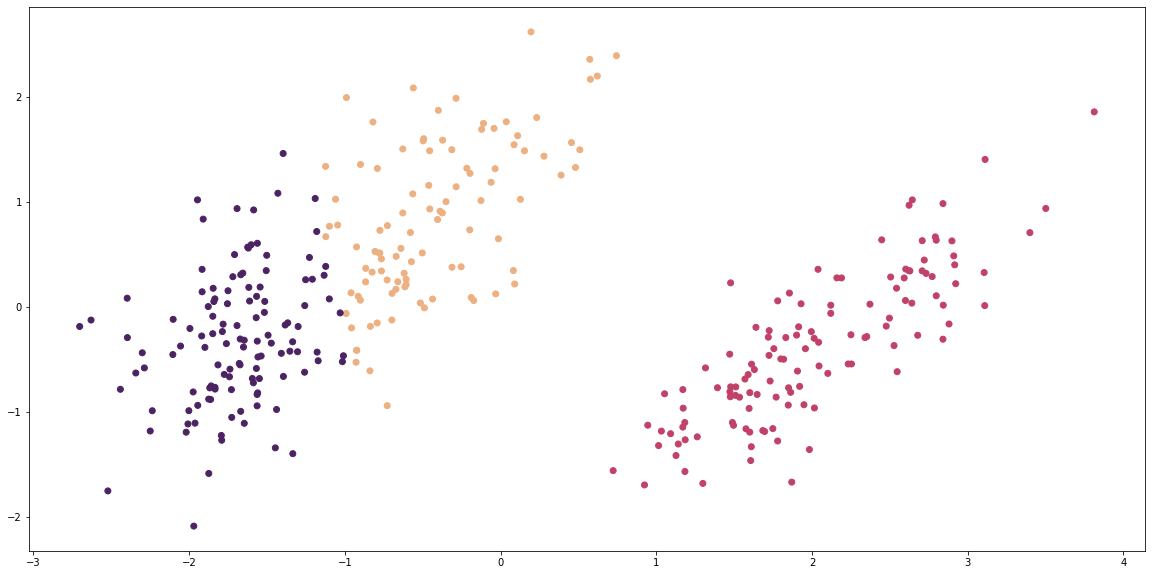

In [123]:
plt.figure(figsize=(20,10)) 
plt.scatter(X_principal['P1'], X_principal['P2'],  
           c = GaussianMixture(n_components = 3).fit_predict(X_principal), cmap ="flare", alpha = 1.0) 
plt.show() 

In [ ]:
#Draw scatter plot to visualize the GMM output
fig = plt.figure();

plt.scatter(df_out.iloc[:, 0], df_out.iloc[:, 1],
            c=gm.predict(df_out),
            s=5,cmap =plt.cm.Greens
           );
plt.scatter(gm.means_[:, 0], gm.means_[:, 1],
            marker='>',
            s=100,               # marker size
            linewidths=5,      # linewidth of marker edges
            cmap =plt.cm.Greens
            );
plt.show()